# Introduction to Sympy
Sympy (http://www.sympy.org/en/index.html) is a symbolic mathematics package in Python.  It is used in this repository for deriving and explaning algorithms.  It is also used in QMCPACK to generate values for unit testing, and generating code in a few places.

This is not a general introduction to Sympy.  For that, see the [Tutorial](http://docs.sympy.org/latest/tutorial/index.html#tutorial).  This document is focused on the ways Sympy is used in this repository and in QMCPACK.

In [1]:
from sympy import *
# Call the following so expressions are rendered nicely in Jupyter Notebooks
init_printing()

## Symbols

There are several way to create symbols.  The the most basic is 'Symbol'.

In [2]:
a = Symbol('a')
a

In [3]:
i = Symbol('i',integer=True)
i

In [4]:
#  Create multiple symbols - input is string with symbol names separated by spaces
b,c,d = symbols('b c d')
b,c,d

In [5]:
# Some special characters in symbols are recognized as TeX and rendered as such
a2 = Symbol('a_2')
a2

Symbols can be combined into expressions

In [6]:
e = 2*a + 5*b + c*c
e

### Expression evaluation
Expressions are evaluated through substition.  This is done with the `subs` method. There are three ways to specific the substitutions
1. Single value - pass the old value and the new value to subs
2. A list of old value, new value pairs
3. A dictionary where the old values is the key, and the new value is the value

In [7]:
e.subs(a,2)

In [8]:
# List of old value, new value pairs
subslist = [(a,2),(b,1),(c,3)]
e.subs(subslist)

In [9]:
# Dictionary of old value and new values
subsdict = {a:2, b:1, c:3}
e.subs(subsdict)

### Arrays and Matrices
There are several ways to represent indexed values
1. Indexed types (in the tensor module)
2. Concrete matrices.  These have a fixed size and store all the elements.
3. Symbolic matrices.   These represent a matrix more generically.  The size is specified, but could be a variable.  Individual elements are not stored.

In [10]:
c = IndexedBase('c')
c[3]

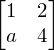

In [11]:
# Concrete matrix
A = Matrix( [[1,2],[a,4]])
A

In [12]:
# Symbolic matrix
B = MatrixSymbol('B',3,3)
B

## Code generation

There are several way to turn Sympy expressions into executable code.  One reason is we want to evaluate expressions faster than substitution described above.  Or we want the code in Python or C++ to interface with or plug into a larger code.

See the Scipy 2017 Tutorial for more on Sympy code generation (http://www.sympy.org/scipy-2017-codegen-tutorial/ )

#### Lambdify
Using 'lambdify' can turn an expression into an executable python function.  It takes two arguments - the first is the input variable (or list of variables), and the second is the expression to convert.

In [13]:
e = 2*a + 3
f1 = lambdify(a, e)
f1(3)

In [14]:
e = 2*a*b
f2 = lambdify([a,b],e)
f2(1,2)

The 'lambdastr' function will return the python expression for the function.   Can be useful for transferring the function to another script.

In [15]:
from sympy.utilities.lambdify import lambdastr
lambdastr([a,b],e)

'lambda a,b: (2*a*b)'